#2021 인공지능 기말 프로젝트

##학번 / 이름:   2017320114 최재원

# a. 실험 내용에 대한 전체 요약

#### 사용한 데이터: Titanic


#### 1) 개요
타이타닉호는 길이 269m에 무게는 46,328톤이었고, 20층의 높이를 지닌 초호화 여객선이다. 타이타닉호 유람선은 1912년 4월 10일, 2,223명의 승객을 태우고 영국의 Southampton Port에서 출항을 해서 미국 New York을 향한 항해를 하던 중, 대서양의 한복판에 있던 20m 크기의 빙산과의 충돌로 1,514명이 사망한 역대 최악의 해양참사라고 할 수 있다.

*출처:https://bisent.tistory.com/289*


---


#### 2) 목표
전처리가 완료된 titanic dataset을 가지고 타이타닉호의 feature에 따라서 생존할(survived) 승객을 예측하는 것이다.


---


#### 3) 모델
1. Decision Tree
2. Logistic Regression
3. Multilayer Perceptron(MLP)


---


#### 4) 실험 목차
1. 데이터에 대한 EDA(Explanatory Data Analysis) 진행
  - EDA 는 pie chart, histogram, kde, bar plot 등 여러 visualization을 통해 진행

2. Split Data

3. Build and Train Model
  - 5-fold cross validatio을 사용해서 최적의 parameter 조정

4. 결과 분석 및 모델 선정
  - 3가지의 모델에 대해서 최적의 parameter를 가지고 5번 진행


---

#### 5) 최종 모델 선정
1. 각각의 최적의 Parameter가 정해진 모델들에 대해서 test set으로 최종 성능(accuracy, precision, recall, f1_score, auroc score) 비교

2. 최종적으로 Logistic Regression 모델 선정




#### 데이터 가져오기

In [2]:
# 1. import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress = True)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [3]:
# 2. import data
url = 'https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv'
df = pd.read_csv(url)

# b. Titanic Data에 대한 EDA(Explanatory Data Analysis)

In [4]:
#1. 전처리 완료된 데이터 확인하기
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.0,3,22.0,1,0,7.2500,0,1
1,1.0,1,38.0,1,0,71.2833,1,0
2,1.0,3,26.0,0,0,7.9250,1,0
3,1.0,1,35.0,1,0,53.1000,1,0
4,0.0,3,35.0,0,0,8.0500,0,1


#### 1. 각 Feature들에 대한 설명

  Survived: 승객들의 생존 유무 (1=생존, 0=사망)

  Pclass: 승객들이 머문 객실의 등급

  Age: 승객들의 나이

  SibSp: 승객들의 형제 혹은 부부의 수

  Parch: 승객들의 부모 혹은 자녀의 수

  Fare: 승객의 지불한 요금

  Sex_female: 여성 승객(1 = 여성, 0 = 남성)

  Sex_male: 남성 승객(1 = 남성, 0 = 여성)




#### 2. Feature 및 Instance 개수

  Feature 개수: 714개

  Instance 개수: 8개

In [5]:
df.describe() # feature 개수 알아보기

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546,0.634454
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.481921
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000


In [ ]:
df.dtypes #각 feature에 대한 자료형

Survived      float64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      int64
Sex_male        int64
dtype: object

####Analysis 0. 나이(Age)별 승객 현황


---


- 본격적으로 data를 비교하기 전, 전체 승객에 대한 나이대별 인원을 확인해 본 결과, 10대 후반, 20대, 30대 인원이 많은 것을 확인할 수 있었다.

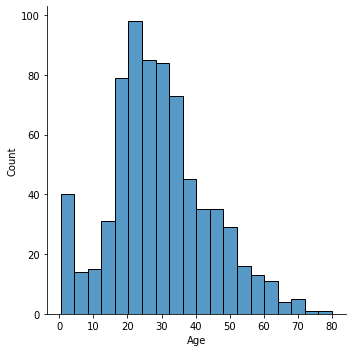

In [ ]:
sns.displot(df, x = 'Age')

####Analysis 1. 전체 타이타닉호 승객들 중 생존(Survived) 비율


---


- 아래의 pie chart에서, 전체 승객들에 대해서 생존자(survived)보다 사망자(non_survived)가 더 많다는 것을 알 수 있다.

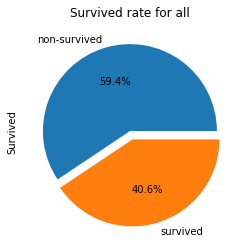

In [6]:
explode = [0, 0.1]
labels = ['non-survived','survived']
df['Survived'].value_counts().plot.pie(autopct = '%.1f%%', explode = explode, labels = labels)
plt.title('Survived rate for all')
plt.show()

####Analysis 2. 성별(Sex) 생존 확률


---


- 전체 승객에 대해서 구해본 후, 성별(sex)에 따른 생존율(survived)를 구해본 결과 여성(sex_female)의 생존율이 남성(sex_male)보다 월등히 높다는 것을 확인했다.

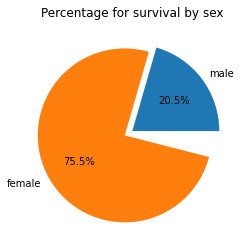

In [7]:
rate_by_sex = df[["Sex_male", "Survived"]].groupby(['Sex_male']).mean().sort_values(by='Survived', ascending=True)
labels = ['male', 'female']
plt.title('Percentage for survival by sex')
plt.pie(rate_by_sex['Survived'], labels=labels, autopct='%.1f%%', explode = [0, 0.1])
plt.show()

####Analysis 3. 나이대에 대한 생존 분포


---


- 나이가 젊을수록 생존 확률이 조금 더 높았다.

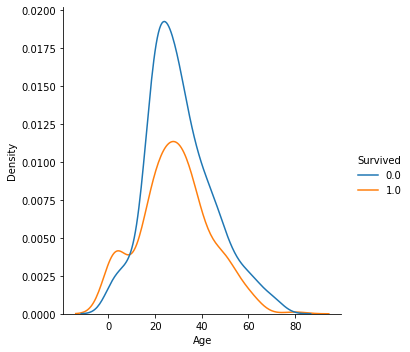

In [ ]:
sns.displot(df, x = 'Age', kind = 'kde', hue = 'Survived') #0527 실습 참고

####Analysis 4. 객실 등급(Pclass)별 생존(Survived)의 나이대(Age)별 분포


---


- 1등급 객실(Pclass)의 생존율(survived)이 월등히 높게 나온 것을 확인할 수 있다.

- 3등급 객실(Pclass)의 생존율(survived)이 낮고 노인분들의 생존율이 매우 낮았다.

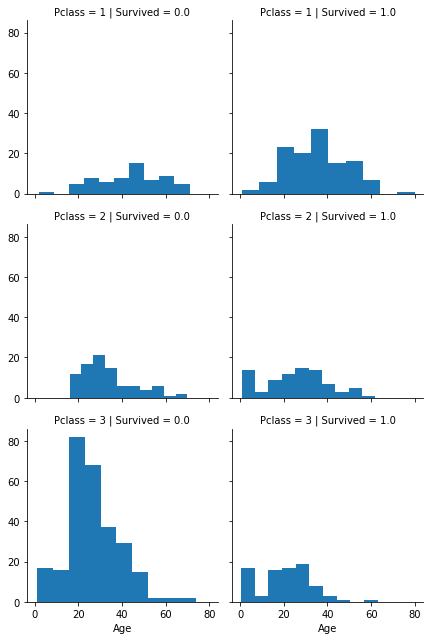

In [ ]:
grid = sns.FacetGrid(df, col = 'Survived', row = 'Pclass')
grid.map(plt.hist, 'Age')
grid.add_legend()
plt.show()

####Analysis 5. 생존(Survived)한 승객들에 대한 요금(Fare) 분포


---


- 요금(Fare)이 높을수록 생존 확률이 높다는 것을 확인할 수 있다.

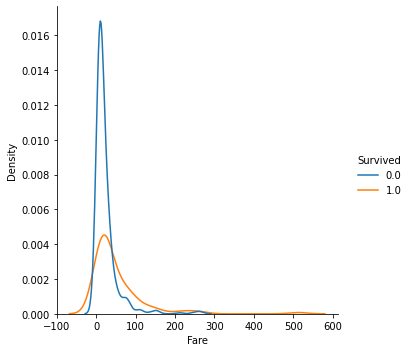

In [ ]:
sns.displot(df, x = 'Fare', kind = 'kde', hue = 'Survived')

####Analysis 6. 연령대별(Age_discription) 생존율(Survived rate)


---

- 나이(Age)를 임의의 연령대(Age_discription)별로 나누어 보았다.
  - 0세 ~ 8세: Baby
  - 9세 ~ 20세: Teenager
  - 21세 ~ 60세: Adult
  - 61세 ~ : Elderly

- 그 결과 나이(Age)가 어린 유아(Baby)의 생존율이 다른 연령대에 비해서 월등히 높았다.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


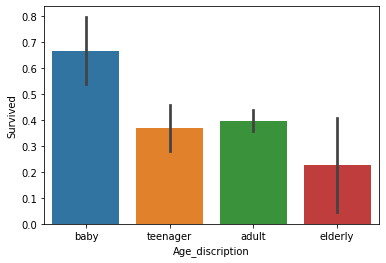

In [ ]:
labels = ['baby', 'teenager', 'adult', 'elderly'] 
df['Age_discription'] = pd.cut(df['Age'], bins = [0, 8, 20, 60, 100], labels = labels) # #임의의 연령별 카테고리 column 생성

sns.barplot('Age_discription', 'Survived', data = df)

In [ ]:
df = df.drop(['Age_discription'], axis = 1)

# c. 실험 방법 & Split Data

#### 1. 실험 방법
- Train Data를 각각 Train set 과 Test set으로 split한다.

- 모델을 생성한다.
  1. Decision Tree
  2. Logistic Regression
  3. Multilayer Perceptron(MLP)

- Parameter에 변경을 주면서 최적의 parameter를 찾을 수 있게 훈련시킨다. 이때 parameter 성능은 cross-validation을 통해서 확인한다.
  - cross-validation은 5-fold cross validation을 사용한다.(이전 실습 참고)
  - Train set을 validation set으로 이용해서 훈련한다.

- 최적의 Parameter를 가진 최종 모델을 선정한다.

- Test set에 대하여 최종 모델의 성능을 평가한다.

#### 2. Train - Test Split

In [ ]:
# split data
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)

y_train = np.array(train_df.pop('Survived'))
y_test = np.array(test_df.pop('Survived'))

X_train = np.array(train_df)
X_test = np.array(test_df)

# d. 모델 생성 & Parameter 조정 과정

In [ ]:
#cross-validation 결과 출력 함수
def get_cv_results(cv_results):
  cv_results.keys()
  print("Accuracy = {}".format(np.mean(cv_results['test_accuracy'])))
  print("Precision =  {}".format(np.mean(cv_results['test_precision'])))
  print("Recall = {}".format(np.mean(cv_results['test_recall'])))
  print("F1_score = {}".format(np.mean(cv_results['test_f1'])))
  print("Roc_Auc = {}".format(np.mean(cv_results['test_roc_auc'])))

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

### 1. Decision Tree

- 이전 Decision Tree(0527) 실습에서 최적의 parameter로 선정된 값들을 전부 취합해서 결과를 내어 보았다.
  - max_depth = 4
  - max_leaf_nodes = 10
  - min_samples_leaf = 40
  - min_samples_split = 100

In [ ]:
decTree_1 = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 10, min_samples_leaf = 40, min_samples_split = 100)
decTree_1_results = cross_validate(decTree_1, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_1_results)

Accuracy = 0.7846071700991609
Precision =  0.8060886164317816
Recall = 0.641073080481036
F1_score = 0.7083682752670499
Roc_Auc = 0.8620672011331492


==> 결과적으로 Default 값보다는 Accuracy, Precision, Roc_auc 값은 증가를 했지만 Recall, F1_score가 상대적으로 낮게 나와 parameter를 조정해서 다시 실험해 보았다
  - max_depth = None / Default 값

  - min_samples_leaf = 1 / Default 값

  - min_samples_split = 2 / Default 값

In [ ]:
#max_depth 제거
print("Remove max_depth\n")
decTree_2 = DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 40, min_samples_split = 100)
decTree_2_results = cross_validate(decTree_2, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_2_results)
print('\n')

#max_leaf_nodes 제거
print("Remove max_leaf_nodes\n")
decTree_7 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 40, min_samples_split = 100)
decTree_7_results = cross_validate(decTree_7, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_7_results)
print('\n')

#min_samples_leaf 제거
print("Remove min_samples_leaf\n")
decTree_3 = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 10, min_samples_split = 100)
decTree_3_results = cross_validate(decTree_3, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_3_results)
print('\n')

#max_depth, min_samples_leaf 제거
print("Remove max_depth, min_samples_leaf\n")
decTree_4 = DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_split = 100)
decTree_4_results = cross_validate(decTree_4, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_4_results)
print('\n')


print('----------------------------------------------------------')
print('\n')

#min_samples_leaf 제거, max_leaf_nodes 12, min_samples_split 40으로 조정
print("Remove min_samples_leaf | Arrange max_leaf to 12 min_split to 40\n")
decTree_5 = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 12, min_samples_split = 40)
decTree_5_results = cross_validate(decTree_5, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_5_results)
print('\n')

#max_depth 제거, min_samples_leaf 제거, max_leaf_nodes 12, min_samples_split 40으로 조정
print("Remove max_depth, min_samples_leaf | Arrange max_leaf to 12 min_split to 40\n")
decTree_6 = DecisionTreeClassifier(max_leaf_nodes = 12, min_samples_split = 40)
decTree_6_results = cross_validate(decTree_6, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_6_results)
print('\n')

#max_depth 제거, min_samples_leaf 제거, max_leaf_nodes 제거, min_samples_split 40으로 조정
print("Remove max_depth, min_samples_leaf, max_leaf_nodes | Arrange max_leaf to 12 min_split to 40\n")
decTree_8 = DecisionTreeClassifier(min_samples_split = 40)
decTree_8_results = cross_validate(decTree_8, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(decTree_8_results)

Remove max_depth

Accuracy = 0.7846071700991609
Precision =  0.8060886164317816
Recall = 0.641073080481036
F1_score = 0.7083682752670499
Roc_Auc = 0.865968979719133


Remove max_leaf_nodes

Accuracy = 0.7846071700991609
Precision =  0.8060886164317816
Recall = 0.641073080481036
F1_score = 0.7083682752670499
Roc_Auc = 0.8620672011331492


Remove min_samples_leaf

Accuracy = 0.7951334858886345
Precision =  0.7979529282977558
Recall = 0.6839037927844588
F1_score = 0.7315776617900394
Roc_Auc = 0.8604666950657822


Remove max_depth, min_samples_leaf

Accuracy = 0.7898703279938978
Precision =  0.7788279406808224
Recall = 0.6967622571692876
F1_score = 0.7303330679918225
Roc_Auc = 0.8662691298094064


----------------------------------------------------------


Remove min_samples_leaf | Arrange max_leaf to 12 min_split to 40

Accuracy = 0.8038749046529367
Precision =  0.8015414518857342
Recall = 0.7093432007400555
F1_score = 0.7475079383980313
Roc_Auc = 0.8472609032705547


Remove max_depth, m



---


1. 총 8개의 Decision Tree를 만들어 Parameter 값이 변화를 주었다. 처음에는 각각의 Parameter에 대해서 default 값으로 바꿨다. 
  - 그 결과, max_leaf_nodes랑 min_samples_leaf를 제거해준 것이 근소한 차이로 높은 점수를 가졌다.


2. 그 다음으로는 max_depth을 none으로 설정해주고 min_samples_leaf를 제거했다.
  - 그 결과, 각각의 parameter들을 제거해준 것 중에서 높은 점수와 비슷하게 나왔다.


3. 1번과 2번 decision tree 과정에서 max_leaf를 12로 증가 min_samples_split은 40으로 감소해서 결과를 지켜봤다.
  - 그 결과, 1번에서 변형 시켜준 것보다 2번에서 변형 시켜준 것이 더 좋은 결과를 보였다.


4. 마지막으로 3번에서 나온 최적의 모델에서 1번에서 높은 점수를 가진 max_leaf_nodes를 제거해준 방법을 따와 3번 최적 모델에서 추가적으로 max_leaf_nodes를 제거해 주었다. 그 결과 max_depth, min_samples_leaf를 제거해주고 parameter를 조정해준 모델보다 점수가 오히려 작게 나왔다.


---


**최종 Decision Tree Model의 Parameter**
  - max_depth: None(default)
  
  - max_leaf_nodes: 12

  - min_samples_leaf: 1(default)

  - min_samples_split: 40

### 2. Logistic Regression

4차 실습 수업에서 Penalty, class_weight를 중점적으로 조정해서 결과를 취합하고, solver는 선택적으로 변형해도 된다고 하여 이를 토대로 Parameter 조정을 했다.

- penalty: Used to specify the norm used in the penalization.
  - {'l1','l2','elasticnet','none'}, default = 'l2'
  - L2: 'newton-cg','sag' and 'lbfgs'
  - elasticnet: 'saga'


- class_weight: Weights associated with classes in the form.
  - dict or 'balanced', defalut = None


- solver: Algorithm to use in the optimization problem.
  - {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default = 'lbfgs'
  - solver 'newton-cg', 'sag', and 'saga' handle l2 or no penalty
  - 'liblinear' and 'saga' also handle l1 penalty
  - 'saga' also supports 'elasticnet' penalty
  - 'liblinear' does not support setting penalty = 'none'


참고문헌: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#penalty: L2, class_weight: balanced, solver: newton-cg
print('penalty: L2, class_weight: balanced, solver = newton-cg\n')
lr_2 = LogisticRegression(penalty = 'l2', class_weight = 'balanced', solver = 'newton-cg', max_iter = 10000, random_state = 42)
lr_2_results = cross_validate(lr_2, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_2_results)
print('\n')

#penalty: L2, class_weight: balanced, solver: sag
print('penalty: L2, class_weight: balanced, solver = sag\n')
lr_3 = LogisticRegression(penalty = 'l2', class_weight = 'balanced', solver = 'sag', max_iter = 10000, random_state = 42)
lr_3_results = cross_validate(lr_3, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_3_results)
print('\n')

#penalty: L1, class_weight: balanced, solver: saga
print('penalty: L1, class_weight: balanced, solver = saga\n')
lr_4 = LogisticRegression(penalty = 'l1', class_weight = 'balanced', solver = 'saga', max_iter = 10000, random_state = 42)
lr_4_results = cross_validate(lr_4, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_4_results)
print('\n')

#penalty: L1, class_weight: balanced, solver: liblinear
print('penalty: L1, class_weight: balanced, solver = liblinear\n')
lr_5 = LogisticRegression(penalty = 'l1', class_weight = 'balanced', solver = 'liblinear', max_iter = 10000, random_state = 42)
lr_5_results = cross_validate(lr_5, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_5_results)
print('\n')

#penalty: L2, class_weight: balanced, solver: liblinear
print('penalty: L2, class_weight: balanced, solver = liblinear\n')
lr_6 = LogisticRegression(penalty = 'l2', class_weight = 'balanced', solver = 'liblinear', max_iter = 10000, random_state = 42)
lr_6_results = cross_validate(lr_6, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_6_results)
print('\n')

#penalty: L2, class_weight: dict, solver: lbfgs
print('penalty: L2, class_weight: dict, solver = lbfgs\n')
lr_7 = LogisticRegression(penalty = 'l2', class_weight = dict, solver = 'lbfgs', max_iter = 10000, random_state = 42)
lr_7_results = cross_validate(lr_7, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_7_results)
print('\n')

#penalty: L2, class_weight: dict, solver: newton-cg
print('penalty: L2, class_weight: dict, solver = newton-cg\n')
lr_8 = LogisticRegression(penalty = 'l2', class_weight = dict, solver = 'newton-cg', max_iter = 10000, random_state = 42)
lr_8_results = cross_validate(lr_8, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_8_results)
print('\n')

#class_weight: balanced, solver: lbfgs
print('class_weight: balanced, solver = lbfgs\n')
lr_9 = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', max_iter = 10000, random_state = 42)
lr_9_results = cross_validate(lr_9, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(lr_9_results)
print('\n')

#penalty: L2, class_weight: dict, solver: liblinear / 앞서 L1, balanced, liblinear 가 좋은 성능을 보였지만, L1은 dict에서는 안되서 L2로 진행 / L2도 dict에서는 안됨

#penalty: elasticnet, class_weight: balanced, solver: saga 안됨, class_weight none도 안됨

penalty: L2, class_weight: balanced, solver = newton-cg

Accuracy = 0.8073836765827613
Precision =  0.7537745532995807
Recall = 0.7862164662349675
F1_score = 0.7695208518189884
Roc_Auc = 0.8665428638491172


penalty: L2, class_weight: balanced, solver = sag

Accuracy = 0.7863615560640733
Precision =  0.7507284701114488
Recall = 0.7177613320999076
F1_score = 0.7328664140919592
Roc_Auc = 0.8568437672333765


penalty: L1, class_weight: balanced, solver = saga

Accuracy = 0.7863615560640732
Precision =  0.7481074025964258
Recall = 0.7220166512488436
F1_score = 0.7339674014827349
Roc_Auc = 0.8549988467089378


penalty: L1, class_weight: balanced, solver = liblinear

Accuracy = 0.8109077040427154
Precision =  0.7666469486345263
Recall = 0.773450508788159
F1_score = 0.7699072743894475
Roc_Auc = 0.8666571371254952


penalty: L2, class_weight: balanced, solver = liblinear

Accuracy = 0.7986270022883295
Precision =  0.7553787878787878
Recall = 0.7520814061054578
F1_score = 0.753536740401729
Roc_



---


- 가장 먼저 scikit learn 사이트에서 
LogisticRegression의 parameter들의 조합을 생각했다. 설명을 읽으면서 서로 가능하지 않은 조합들도 찾아냈고, 그 결과 대표적으로 9개의 LogisticRegression model을 만들어 냈다.

1. Class_weight: 'Balanced'에 관한 조합을 살펴본 바, penalty 'L1' 와 solver 'liblinear'가 가장 좋은 성능을 보였다.

2. Class_weight: dict에 과한 조합을 살펴본 바, penalty 'L2' 와 solver 'lbfgs'가 가장 좋은 성능을 보였다.

3. 다음으로는 가장 좋은 성능을 보인 'L1', 'balanced', 'liblinear'에서 class_weight을 balanced에서 dict으로 바꾸려고 했지만, 'L1', 'L2', 다 solver: 'liblinear'에서는 오류가 나서 실패했다. 따라서 class_weight: dict에서는 solver는 'lbfgs' 와 'newton-cg'를 사용했고, 좋은 성능을 보여줬다.

4. 마지막으로 penalty 'elasticnet'에서 실험을 진행하려고 여러 가능한 parameter들의 조합을 맞춰봤는데, 오류가 나서 parameter 조정을 종료하고 최종 모델을 선정하게 되었다. {'L1', 'balanced', 'liblinear'} 와 {'L2', 'dict', 'lbfgs'} 중에 고민을 했는데 Accuracy는 근소한 차이로 후자가 좋았지만 recall에서 전자가 좋은 성능을 보여서 최종 모델을 {'L1', 'balanced', 'liblinear'}로 정하게 되었다.


---



**최종 Logistic Regression Model의 Parameter**
  - penalty: 'L1'
  
  - class_weight: 'balanced'

  - solver: 'liblinear'

### 3. Multilayer Perceptron(MLP)

조정할 Parameter는 아래와 같다. 

- hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer
  - tuple, length = n_layers -2, default=(100,)
  
- activation: Activation function for the hidden layer
  - {'identity','logistic','tanh','relu'}, default = 'relu'

- solver: The solver for weight optimization
  - {'lbfgs', 'sgd', 'adam'}, default = 'adam'

참고문헌: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
#hidden layer size: 100, 2 | activation: identity
print('hidden layer size: 100, 2 | activation: identity\n')
mlp1 = MLPClassifier(hidden_layer_sizes = (100, 2), max_iter = 1000, activation = 'identity', solver = 'adam')
mlp1_results = cross_validate(mlp1, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(mlp1_results)
print('\n')

#hidden layer size: 200, 2 | activation: tanh
print('hidden layer size: 200, 2 | activation: tanh\n')
mlp2 = MLPClassifier(hidden_layer_sizes = (200, 2), max_iter = 1000, activation = 'tanh', solver = 'adam')
mlp2_results = cross_validate(mlp2, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(mlp2_results)
print('\n')

#hidden layer size: 200, 2 | activation: logistic
print('hidden layer size: 200, 2 | activation: logistic\n')
mlp3 = MLPClassifier(hidden_layer_sizes = (200, 2), max_iter = 1000, activation = 'logistic', solver = 'adam')
mlp3_results = cross_validate(mlp3, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(mlp3_results)
print('\n')

#hidden layer size: 200, 4 | activation: logistic
print('hidden layer size: 200, 4 | activation: logistic\n')
mlp4 = MLPClassifier(hidden_layer_sizes = (200, 4), max_iter = 1000, activation = 'logistic', solver = 'adam')
mlp4_results = cross_validate(mlp4, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(mlp4_results)
print('\n')

#hidden layer size: 200, 4 | activation: identity
print('hidden layer size: 200, 4 | activation: identity\n')
mlp5 = MLPClassifier(hidden_layer_sizes = (200, 4), max_iter = 1000, activation = 'identity', solver = 'adam')
mlp5_results = cross_validate(mlp4, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(mlp5_results)
print('\n')

#hidden layer size: 200, 4 | activation: tanh
print('hidden layer size: 200, 4 | activation: tanh\n')
mlp6 = MLPClassifier(hidden_layer_sizes = (200, 4), max_iter = 1000, activation = 'tanh', solver = 'adam')
mlp6_results = cross_validate(mlp6, X_train, y_train, scoring = scoring, cv = 5)
get_cv_results(mlp6_results)
print('\n')







hidden layer size: 100, 2 | activation: identity

Accuracy = 0.7845766590389015
Precision =  0.7678122873519903
Recall = 0.6793709528214616
F1_score = 0.7193829540272768
Roc_Auc = 0.8540909954769873


hidden layer size: 200, 2 | activation: tanh

Accuracy = 0.8143859649122808
Precision =  0.8153892761469305
Recall = 0.713691026827012
F1_score = 0.7598411414317978
Roc_Auc = 0.8638736853903198


hidden layer size: 200, 2 | activation: logistic

Accuracy = 0.8161250953470633
Precision =  0.8367838354854136
Recall = 0.6880666049953745
F1_score = 0.7542625758610789
Roc_Auc = 0.8716433747895447


hidden layer size: 200, 4 | activation: logistic

Accuracy = 0.8091533180778032
Precision =  0.8075082217524077
Recall = 0.7096207215541167
F1_score = 0.7526886158929225
Roc_Auc = 0.87010793423642


hidden layer size: 200, 4 | activation: identity

Accuracy = 0.8055987795575896
Precision =  0.7854770229770229
Recall = 0.7266419981498613
F1_score = 0.7538790715758397
Roc_Auc = 0.8711302820933694


hi



---


- Scikit learn에서 MLP 모델에 살펴본 바, solver, 즉 optimization 방법을 adam으로 고정해 놓은 채, activation 그리고 hidden layer의 크기를 조정해서 최적의 모델을 찾는 실험을 총 6개의 모델을 기준으로 진행했다.

1. Hidden layer size: hidden layer size는 어떠한 activation parameter에서도 (100,2) 보다는 (200,2)가 더 좋은 성능을 보였다. 따라서 (200,2)를 고르게 되었고, 추후에 (200,4)로 layer size를 높여서 진행해본 결과, (200,4)가 accuracy 뿐만이 아니라 precision, recall 등에서 더 안정적인 확률을 보여서 (200,4)로 parameter를 조정하게 되었다.

2. activation: activation은 여러가지 조합들을 hidden layer 와 맞춰서 진행해 본 결과, 모든 activation이 hidden layer size를 높이면서 조정해 나갈 때 좋은 성능을 보여줬다.

4. 최종적으로 모델의 parameter를 선정할 때, hidden layer (200,2) activation 'tanh' 과 hidden layer (200,4) activation 'identity'중에서 고민을 하게 되었으며, 결과적으로 hidden layer의 size 가 (200,4)가 어떠한 activation이든 안정적인 결과를 보여서 최종 모델을 후자로 고르게 되었다.


---


**최종 Multilayer Percetpron Model의 Parameter**
  - hidden_layer_sizes: (200, 4)
  
  - activation: 'identity'

  - solver: 'adam'

# e. 실험 결과 비교

- 앞서 진행한 실험들에서 3가지의 모델의 최종 parameter를 선정했다.

- 이 각각의 모델들에 대해서 최종 성능 제시는 test set으로 이루어질 것이며, 최종 성능의 평가 목록은 아래와 같다.
  - confusion matrix

  - accuracy: TP + TN / N

  - precision: TP / TP + FP

  - recall: TP / TP + FN

  - f1 score: 2 * (precision * recall) / (precision + recall)

  - roc_auc: tradeoff between TPR and FPR


- ***auroc curve*** 는 best case는 TPR이 1이고 FPR이 0인 왼쪽 위로 직각을 이루는 것이고, worst case는 중간으로 일직선 즉 auc가 0.5인 경우 randomly guessing이라고도 한다. 만약 직선이 random classifer 직선 밑으로 간다면 그것은 model의 문제가 있는 것이고 다시 설계를 해야 한다.

- True Positive Rate(TPR) = TP/(TP+FN)
  - TPR이 증가하는 것은 좋은 수치다.

- False Positive Rate(FPR) = FP/(FP+TN)
  - FPR이 증가하는 것은 실제로 Negative인 것을 Positive로 예측한 것이기 때문에 증가 할수록 안 좋은 수치다.

### 1. Decision Tree


---


**최종 Decision Tree Model의 Parameter**
  - max_depth: None(default)
  
  - max_leaf_nodes: 12

  - min_samples_leaf: 1(default)

  - min_samples_split: 40

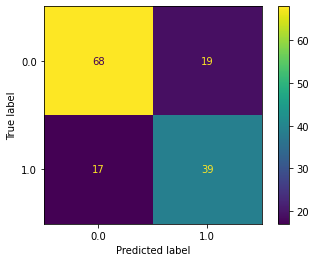

In [ ]:
decTree_test = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = 12, min_samples_leaf = 1, min_samples_split = 40)
decTree_test.fit(X_train, y_train)

plot_confusion_matrix(decTree_test, X_test, y_test, normalize = None, values_format = 'd')

In [ ]:
decTree_y_pred = decTree_test.predict(X_test)
decTree_roc = decTree_test.predict_proba(X_test)[:, 1]

print("accuracy = {}".format(decTree_test.score(X_test, y_test)))
print("precision = {}".format(precision_score(y_test, decTree_y_pred)))
print("recall = {}".format(recall_score(y_test, decTree_y_pred)))
print("f1_score = {}".format(f1_score(y_test, decTree_y_pred)))
print("roc_auc_score = {}".format(roc_auc_score(y_test, decTree_roc)))

accuracy = 0.7482517482517482
precision = 0.6724137931034483
recall = 0.6964285714285714
f1_score = 0.6842105263157895
roc_auc_score = 0.8097290640394089



- Decision Tree model의 최종 test set을 이용한 confusion matrix 및 여러 항목들의 점수를 출력해 보았다.

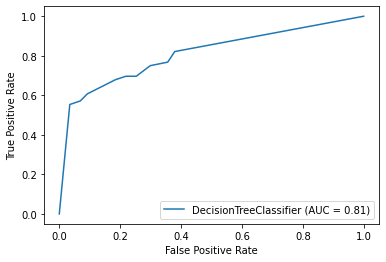

In [ ]:
# plot auroc curve
plot_roc_curve(decTree_test, X_test, y_test)

### 2. Logistic Regression


---


**최종 Logistic Regression Model의 Parameter**
  - penalty: 'L1'
  
  - class_weight: 'balanced'

  - solver: 'liblinear'


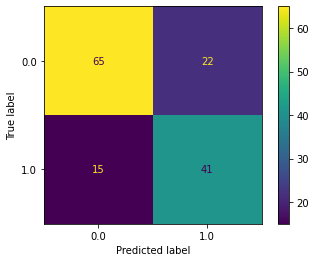

In [ ]:
lr_test = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear', max_iter=10000)
lr_test.fit(X_train, y_train)

plot_confusion_matrix(lr_test, X_test, y_test, normalize = None, values_format = 'd')

In [ ]:
lr_y_pred = lr_test.predict(X_test)
lr_roc = lr_test.predict_proba(X_test)[:, 1]

print("accuracy = {}".format(lr_test.score(X_test, y_test)))
print("precision = {}".format(precision_score(y_test, lr_y_pred)))
print("recall = {}".format(recall_score(y_test, lr_y_pred)))
print("f1_score = {}".format(f1_score(y_test, lr_y_pred)))
print("roc_auc_score = {}".format(roc_auc_score(y_test, lr_roc)))

accuracy = 0.7412587412587412
precision = 0.6507936507936508
recall = 0.7321428571428571
f1_score = 0.6890756302521008
roc_auc_score = 0.8139367816091954


- Logistic Regression model의 최종 test set을 이용한 confusion matrix 및 여러 항목들의 점수를 출력해 보았다.

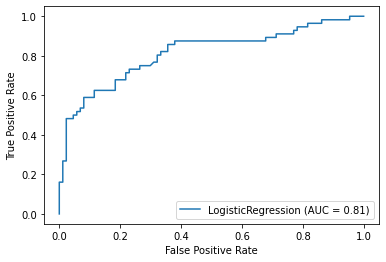

In [ ]:
# plot auroc curve
plot_roc_curve(lr_test, X_test, y_test)

### 3. Multilayer Perceptron(MLP)


---

**최종 Multilayer Percetpron Model의 Parameter**
  - hidden_layer_sizes: (200, 4)
  
  - activation: 'identity'

  - solver: 'adam'

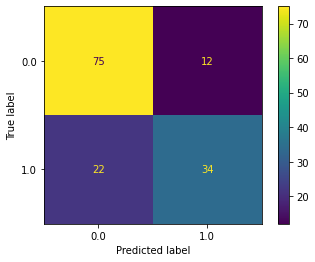

In [ ]:
mlp_test = MLPClassifier(hidden_layer_sizes=(200,4), activation='identity', solver='adam')
mlp_test.fit(X_train, y_train)

plot_confusion_matrix(mlp_test, X_test, y_test, normalize = None, values_format = 'd')

In [ ]:
mlp_y_pred = mlp_test.predict(X_test)
mlp_roc = mlp_test.predict_proba(X_test)[:, 1]

print("accuracy = {}".format(mlp_test.score(X_test, y_test)))
print("precision = {}".format(precision_score(y_test, mlp_y_pred)))
print("recall = {}".format(recall_score(y_test, mlp_y_pred)))
print("f1_score = {}".format(f1_score(y_test, mlp_y_pred)))
print("roc_auc_score = {}".format(roc_auc_score(y_test, mlp_roc)))

accuracy = 0.7622377622377622
precision = 0.7391304347826086
recall = 0.6071428571428571
f1_score = 0.6666666666666666
roc_auc_score = 0.8071633825944169


- MLP model의 최종 test set을 이용한 confusion matrix 및 여러 항목들의 점수를 출력해 보았다.

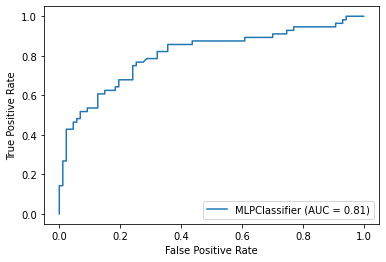

In [ ]:
# plot auroc curve
plot_roc_curve(mlp_test, X_test, y_test)

# f. 결론

- Titanic data set에 대하여 train set을 이용해서 학습을 시켰고, 최종적으로 선정된 각각의 parameter에 대해서 test set으로 평가를 해본 결과, 아래와 같이 최종 모델 선정을 할 수 있었다. 최종 모델 평가는 AUROC score로 비교를 해서 선정하였다.

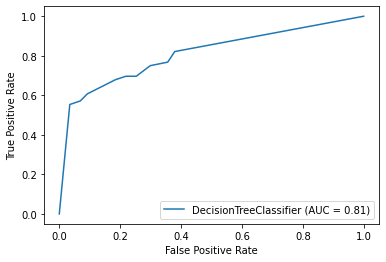

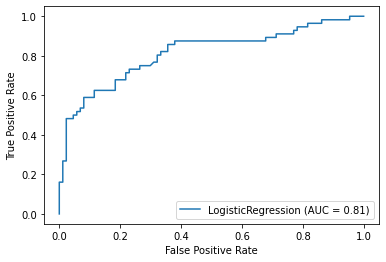

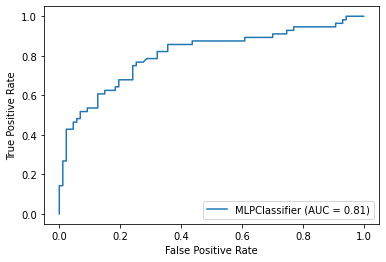

In [ ]:
plot_roc_curve(decTree_test, X_test, y_test)
plot_roc_curve(lr_test, X_test, y_test)
plot_roc_curve(mlp_test, X_test, y_test)

In [ ]:
# 최종 모델 선정
print("DECISION TREE MODEL")
print("roc_auc_score = {}".format(roc_auc_score(y_test, decTree_roc)))
print("------------------------------------------------------------")
print("\n")
print("LOGISTIC REGRESSION MODEL")
print("roc_auc_score = {}".format(roc_auc_score(y_test, lr_roc)))
print("------------------------------------------------------------")
print("\n")
print("MULTILAYER PERCEPTRON MODEL")
print("roc_auc_score = {}".format(roc_auc_score(y_test, mlp_roc)))

DECISION TREE MODEL
roc_auc_score = 0.8097290640394089
------------------------------------------------------------


LOGISTIC REGRESSION MODEL
roc_auc_score = 0.8139367816091954
------------------------------------------------------------


MULTILAYER PERCEPTRON MODEL
roc_auc_score = 0.8071633825944169


## **"Titanic Data에 대해서 생존 가능한 승객을 예측하는 모델은 Logistic Regression Model로 최종 성능 *0.814*을 보이며 선택을 했다."**